<a href="https://colab.research.google.com/github/USMS-FPK-IA-GI-2025/controle01-numpy-matplotlib-iris/blob/main/notebooks/controle_numpy_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contrôle 01 — Data Science avec NumPy et Matplotlib
**Master 1 — Intelligence Artificielle & Génie Informatique (FPK / USMS)**

Nom & Prénom : KASMI ACHRAF 
Filière :  SIIA
Année universitaire : 2025-2026

---

**Règles :**
- Bibliothèques autorisées : NumPy, Matplotlib
- Toute autre bibliothèque est interdite
- Chaque question doit être traitée dans une cellule dédiée
- Chaque résultat doit être brièvement interprété


# Partie A — Importation du Dataset, Arrays, Premières Manipulations

### A1. Importation du dataset
Importez NumPy et Matplotlib.  
Chargez le fichier `iris.csv` avec `np.genfromtxt` (`delimiter=','`, `skip_header=1`).  
Stockez les données dans un array nommé `data` et affichez sa `shape`.


In [33]:

import numpy as np
import matplotlib.pyplot as plt

#data = np.genfromtxt('../data\\Iris.csv',delimiter=',', skip_header=1)
data = np.genfromtxt('../data/Iris.csv', delimiter=',', skip_header=1)

print(data.shape)




(150, 6)


### A2. Séparation des features et des espèces
Séparez :
- les 4 premières colonnes numériques dans un array `features`
- la dernière colonne (espèces) dans un array `species`
Utilisez le slicing.


In [5]:

features = data[:, 1:5]
species = np.genfromtxt(
    '../data/Iris.csv',
    delimiter=',',
    skip_header=1,
    usecols=5,
    dtype=str
)




### A3. Indexing
Affichez les 5 premières lignes de `features` en utilisant l’indexing.


In [6]:
print(features[:5])


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


### A4. Extraction d’une colonne
Créez un array `sepal_length` contenant uniquement la première colonne de `features`.  
Affichez sa `size` et son `dtype`.


In [7]:
sepal_length = features[:,0]

print("Size du colomn", sepal_length.size)
print("Dtype", sepal_length.dtype)


Size du colomn 150
Dtype float64


### A5. Slicing par espèce
Utilisez le slicing pour extraire les 50 premières lignes correspondant à l’espèce *Setosa*.  
Stockez-les dans `setosa_features`.


In [8]:
setosa_features = features[:50]


# Partie B — Statistiques Basiques et Opérations Mathématiques

### B6. Moyenne par colonne
Calculez la moyenne de chaque colonne de `features` avec `np.mean(axis=0)`.


In [9]:
mean_features = np.mean(features, axis=0)


### B7. Min et Max
Trouvez la valeur minimale et maximale de la longueur des pétales.


In [10]:
petal_length = features[:,2]

min_petal = np.min(petal_length)
max_petal = np.max(petal_length)


### B9. Normalisation
Normalisez les longueurs des pétales en les divisant par leur maximum.
Stockez le résultat dans `normalized_petals`.


In [11]:
normalized_petals = petal_length / max_petal


### B10. Somme cumulée
Calculez la somme cumulée des largeurs des pétales pour Versicolor.
Affichez les 10 premières valeurs.


In [12]:
Versicolor_width_petal = features[50:100,3]
cumsum_versicolor = np.cumsum(Versicolor_width_petal)
print(cumsum_versicolor[:10])


[ 1.4  2.9  4.4  5.7  7.2  8.5 10.1 11.1 12.4 13.8]


### B10. Somme cumulée
Calculez la somme cumulée des largeurs des pétales pour Versicolor.
Affichez les 10 premières valeurs.


In [13]:
Versicolor_width_petal = features[50:100,3]
cumsum_versicolor = np.cumsum(Versicolor_width_petal)
print(cumsum_versicolor[:10])


[ 1.4  2.9  4.4  5.7  7.2  8.5 10.1 11.1 12.4 13.8]


# Partie C — Transformations Avancées avec NumPy

### C11. Espèces uniques
Listez les espèces uniques avec `np.unique` et comptez leurs occurrences.


In [14]:
unique_species, counts = np.unique(species, return_counts=True)

print("Espèces uniques :")
print(unique_species)
print("\nNombre d'occurrences :")
print(counts)


Espèces uniques :
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Nombre d'occurrences :
[50 50 50]


### C12. Reshape par espèce
Transformez `features` en un array de forme `(3, 50, 4)` nommé `features_by_species`.


In [15]:
features_by_species = features.reshape(3,50,4)


### C13. Concaténation
Concaténez horizontalement les moyennes par colonne avec un array de zéros.


In [16]:
means = np.mean(features, axis=0)
zeros = np.zeros(means.shape)
concatenation = np.concatenate((means, zeros))


### C14. Data cleaning (simulation)
Simulez des valeurs NaN et remplacez-les avec `np.nan_to_num`.


In [17]:
# On fait une copie pour ne pas bousiller l'array d'origine
features_nan = features.copy()

# On force quelques valeurs à NaN pour simuler des données manquantes
features_nan[0, 0] = np.nan
features_nan[1, 1] = np.nan
features_nan[2, 2] = np.nan

# Nettoyage
features_clean = np.nan_to_num(features_nan)


### C15. Broadcasting
Ajoutez 1 à toutes les valeurs de la première colonne de `features`.


In [18]:
features[:, 0] = features[:,0] + 1


### C16. np.where
Créez un array binaire indiquant si la longueur des pétales est supérieure à 4.0.


In [19]:
is_long_petal = np.where(petal_length > 4.0, 1, 0)


# Partie D — Visualisation avec Matplotlib (Plots Simples)

### D17. Line plot
Line plot des longueurs des sépales pour les 50 premières fleurs.


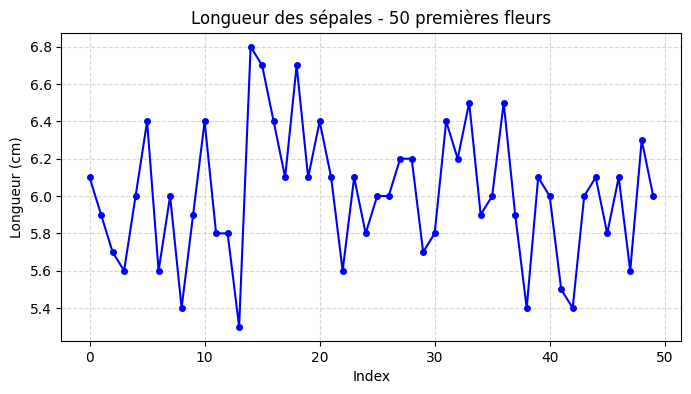

In [20]:
# On récupère les sépales des 50 premières iris (Setosa)
sl_50 = features[:50, 0]

plt.figure(figsize=(8, 4))
plt.plot(sl_50, 'bo-', markersize=4) # 'bo-' pour bleu, points et ligne en un seul argument

plt.title("Longueur des sépales - 50 premières fleurs")
plt.xlabel("Index")
plt.ylabel("Longueur (cm)")
plt.grid(ls='--', alpha=0.5) # Grille un peu plus légère

# Sauvegarde dans le dossier de l'exercice
path_out = r'../figures/sepal_length_line_plot.png'
plt.savefig(path_out)


### D18. Scatter plot
Scatter plot : longueur vs largeur des pétales.


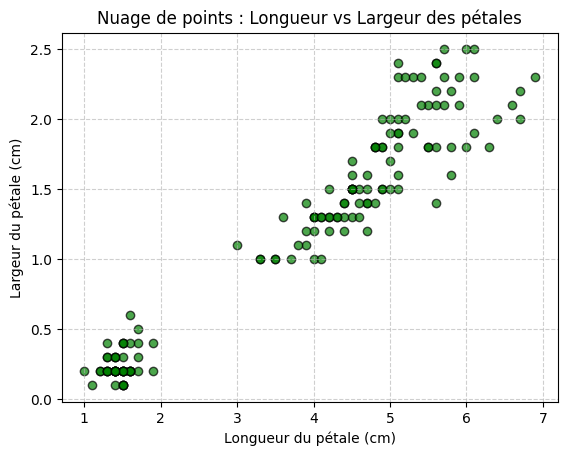

In [21]:

petal_widths = features[:,3]

plt.scatter(petal_length,petal_widths,alpha=0.7, c='green', edgecolors='black')
plt.title('Nuage de points : Longueur vs Largeur des pétales')
plt.xlabel('Longueur du pétale (cm)')
plt.ylabel('Largeur du pétale (cm)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.savefig('../figures/petal_scatter_plot.png')


### D19. Bar chart
Bar chart des moyennes des quatre caractéristiques.


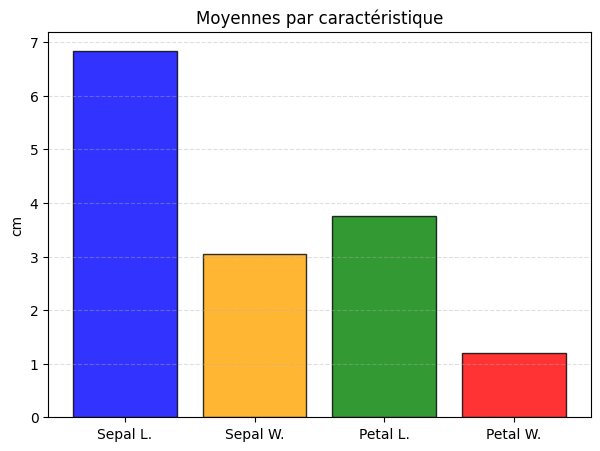

In [22]:
# On calcule la moyenne de chaque colonne de features
moyennes = features.mean(axis=0)
noms = ['Sepal L.', 'Sepal W.', 'Petal L.', 'Petal W.']

# Petit réglage de la figure
plt.figure(figsize=(7, 5))
couleurs = ['b', 'orange', 'g', 'r'] # bleus, orange, vert, rouge en raccourci

# Création du bar chart
plt.bar(noms, moyennes, color=couleurs, ec='k', alpha=0.8)

plt.title("Moyennes par caractéristique")
plt.ylabel("cm")
plt.grid(axis='y', ls='--', alpha=0.4)

# Chemin de sauvegarde
save_to = r'../figures/means_bar_chart.png'
plt.savefig(save_to)


### D20. Histogram
Histogramme de la largeur des sépales (10 bins).


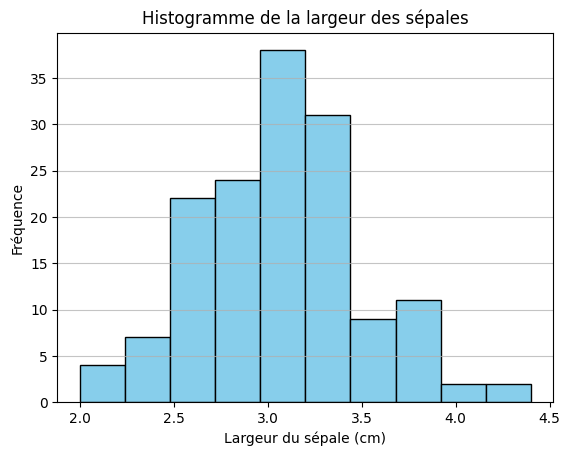

In [23]:
sepal_widths = features[:,1]
plt.hist(sepal_widths, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogramme de la largeur des sépales')
plt.xlabel('Largeur du sépale (cm)')
plt.ylabel('Fréquence')
plt.grid(axis='y', alpha=0.75)
plt.savefig('../figures/sepal_width_histogram.png')


### D21. Boxplot par espèce
Boxplot des longueurs des pétales par espèce.


/var/folders/20/wvdv2dd54sx8gvqy9h3r_3s40000gn/T/ipykernel_18750/2612897138.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([setosa_petal_length,versicolor_petal_length,virginica_petal_length],labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])


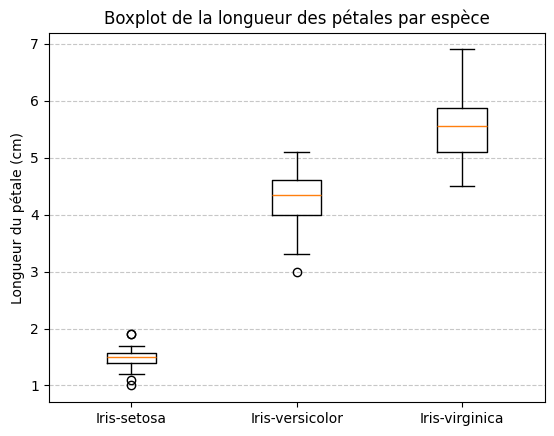

In [24]:

# Extraction des longueurs de pétales par bloc de 50 (setosa, versicolor, virginica)
setosa_petal_length = features[:50, 2]
versicolor_petal_length = features[50:100,2]
virginica_petal_length = features[100:150,2]
# Création du boxplot avec les noms des espèces
plt.boxplot([setosa_petal_length,versicolor_petal_length,virginica_petal_length],labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.title('Boxplot de la longueur des pétales par espèce')
plt.ylabel('Longueur du pétale (cm)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.savefig('figures\\petal_length_boxplot.png')


# Partie E — Visualisations Avancées

### E22. Subplots comparatifs
Deux scatter plots côte à côte : Setosa vs Versicolor.


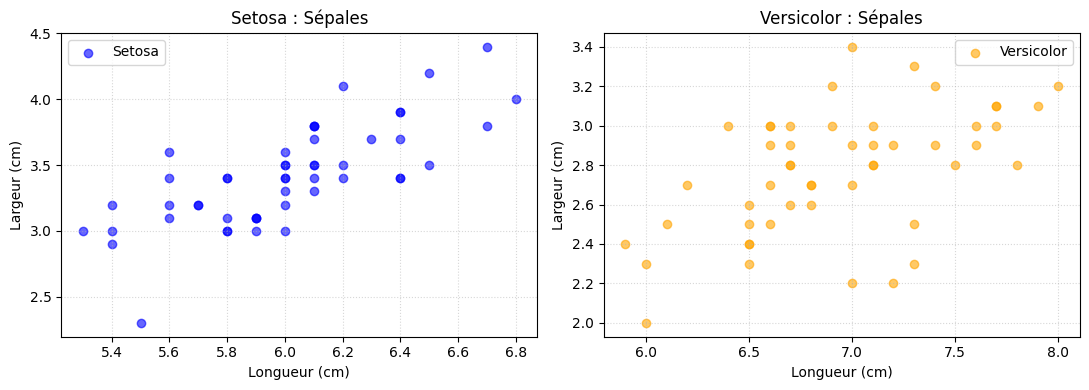

In [25]:
# On prépare les données pour les deux espèces (colonnes 0 et 1 pour les sépales)
s_data = features[:50, :2]
v_data = features[50:100, :2]

# Création de la figure avec les deux zones de dessin
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 4))

# Tracé pour Setosa
ax1.scatter(s_data[:, 0], s_data[:, 1], c='b', label='Setosa', alpha=0.6)
ax1.set_title('Setosa : Sépales')
ax1.legend()

# Tracé pour Versicolor 
ax2.scatter(v_data[:, 0], v_data[:, 1], c='orange', label='Versicolor', alpha=0.6)
ax2.set_title('Versicolor : Sépales')
ax2.legend()

# On applique des labels communs aux deux axes pour éviter la répétition lourde
for ax in [ax1, ax2]:
    ax.set_xlabel('Longueur (cm)')
    ax.set_ylabel('Largeur (cm)')
    ax.grid(ls=':', alpha=0.5)

plt.tight_layout()

# Export vers le dossier figures
dest = r'../figures/comparative_subplots.png'
plt.savefig(dest)

### E23. Grille 2x2
Histogrammes des 4 caractéristiques avec `plt.subplots(2,2)`.


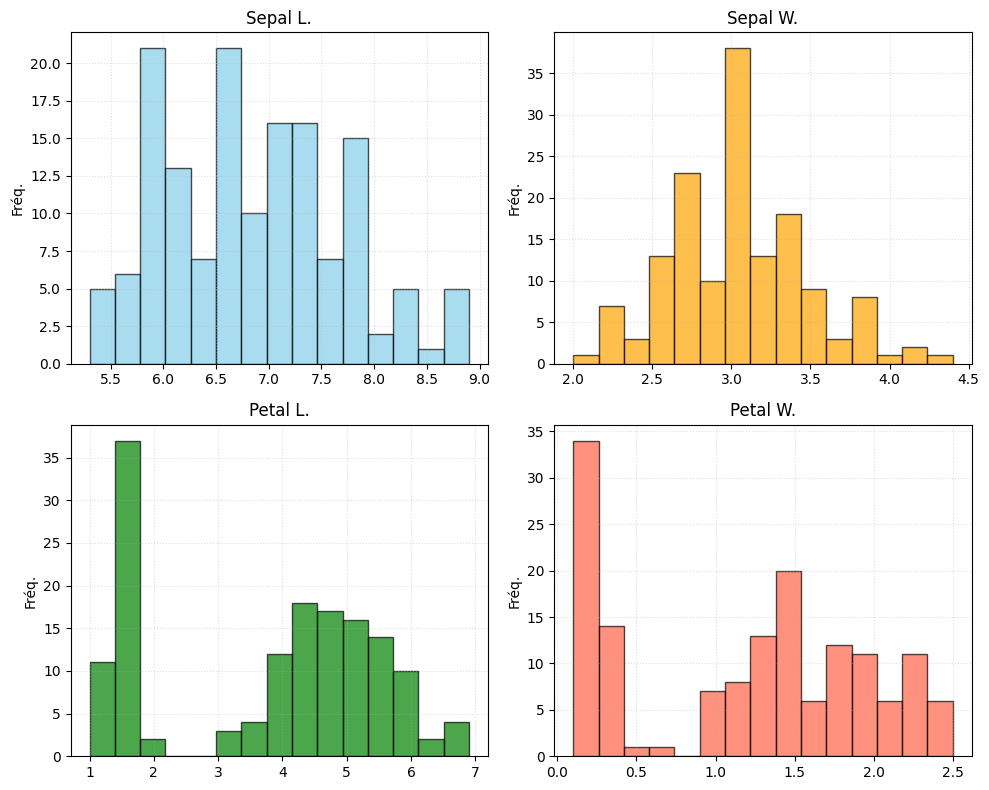

In [26]:
# Préparation des titres et couleurs
labels = ['Sepal L.', 'Sepal W.', 'Petal L.', 'Petal W.']
c = ['skyblue', 'orange', 'green', 'tomato']

# On crée la grille 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten() # On "aplatit" la grille pour boucler plus facilement dessus

for i in range(4):
    axes[i].hist(features[:, i], bins=15, color=c[i], ec='k', alpha=0.7)
    axes[i].set_title(labels[i])
    axes[i].set_ylabel('Fréq.')
    axes[i].grid(ls=':', alpha=0.4)

plt.tight_layout()

# Chemin de sortie
out = r'../figures/features_histograms_grid.png'
plt.savefig(out)


### E24. Bar chart avec error bars
Moyennes par espèce avec écart-type.


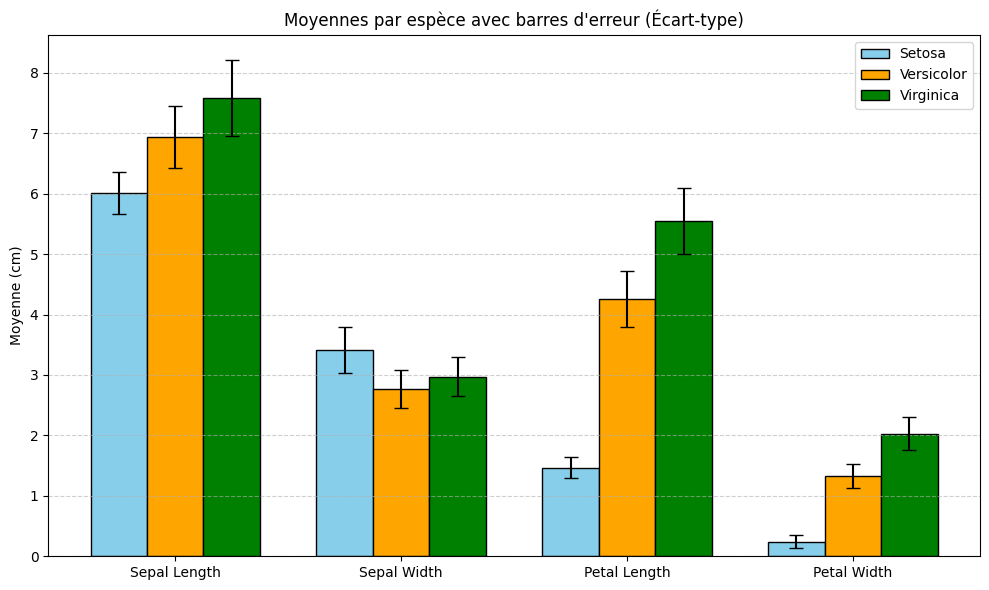

In [27]:

features_by_species = features.reshape(3, 50, 4)

# Calcul des moyennes et des écarts-types
means = np.mean(features_by_species, axis=1) 
stds = np.std(features_by_species, axis=1)    

# Configuration du graphique
labels = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
species_names = ['Setosa', 'Versicolor', 'Virginica']
x = np.arange(len(labels)) 
width = 0.25                

fig, ax = plt.subplots(figsize=(10, 6))

#Création des barres avec l'argument yerr pour l'écart-type
ax.bar(x - width, means[0], width, yerr=stds[0], label=species_names[0], capsize=5, color='skyblue', edgecolor='black')
ax.bar(x,         means[1], width, yerr=stds[1], label=species_names[1], capsize=5, color='orange', edgecolor='black')
ax.bar(x + width, means[2], width, yerr=stds[2], label=species_names[2], capsize=5, color='green', edgecolor='black')


ax.set_ylabel('Moyenne (cm)')
ax.set_title('Moyennes par espèce avec barres d\'erreur (Écart-type)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('../figures/error_bar_chart.png')



### E25. Scatter coloré par espèce
Scatter plot avec couleurs par espèce.


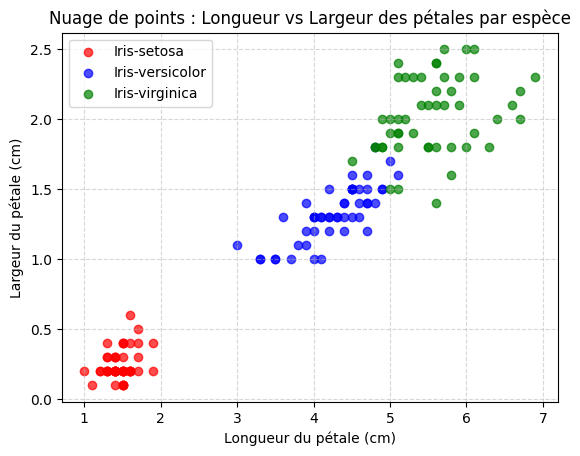

In [28]:

setosa = features[:50]
versicolor = features[50:100]
virginica = features[100:150]

plt.scatter(setosa[:, 2], setosa[:, 3], color='red', label='Iris-setosa', alpha=0.7)
plt.scatter(versicolor[:, 2], versicolor[:, 3], color='blue', label='Iris-versicolor', alpha=0.7)
plt.scatter(virginica[:, 2], virginica[:, 3], color='green', label='Iris-virginica', alpha=0.7)

plt.title('Nuage de points : Longueur vs Largeur des pétales par espèce')
plt.xlabel('Longueur du pétale (cm)')
plt.ylabel('Largeur du pétale (cm)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.savefig('../figures/scatter_colored_by_species.png')




### E26. Line plot superposé
Cumsum des largeurs des pétales par espèce.


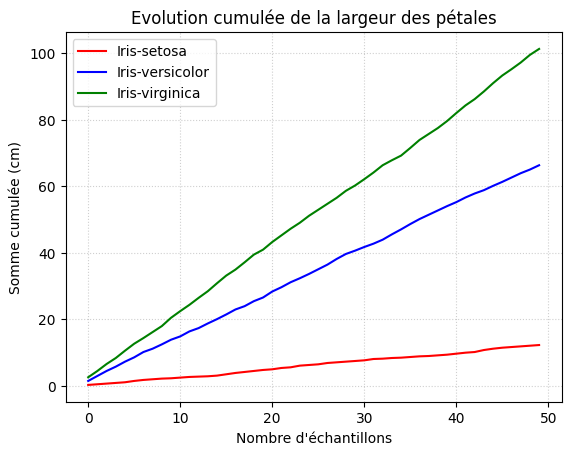

In [29]:
# On calcule les sommes cumulées directement pour chaque groupe
plt.plot(np.cumsum(features[:50, 3]), 'r-', label='Iris-setosa')
plt.plot(np.cumsum(features[50:100, 3]), 'b-', label='Iris-versicolor')
plt.plot(np.cumsum(features[100:150, 3]), 'g-', label='Iris-virginica')

# Mise en forme rapide
plt.title("Evolution cumulée de la largeur des pétales")
plt.xlabel("Nombre d'échantillons")
plt.ylabel("Somme cumulée (cm)")
plt.legend(loc='upper left')
plt.grid(True, ls=':', alpha=0.6)

# Export vers le dossier figures
save_path = r'../figures/cumsum_petal_width.png'
plt.savefig(save_path)


# Partie F — Mini-Analyse Finale

### F27. Corrélations
Calculez la matrice de corrélation avec `np.corrcoef`.


In [30]:
correlation_matrix = np.corrcoef(features, rowvar=False)

### F28. Visualisation des corrélations
Visualisez les corrélations sous forme de bar chart ou scatter.


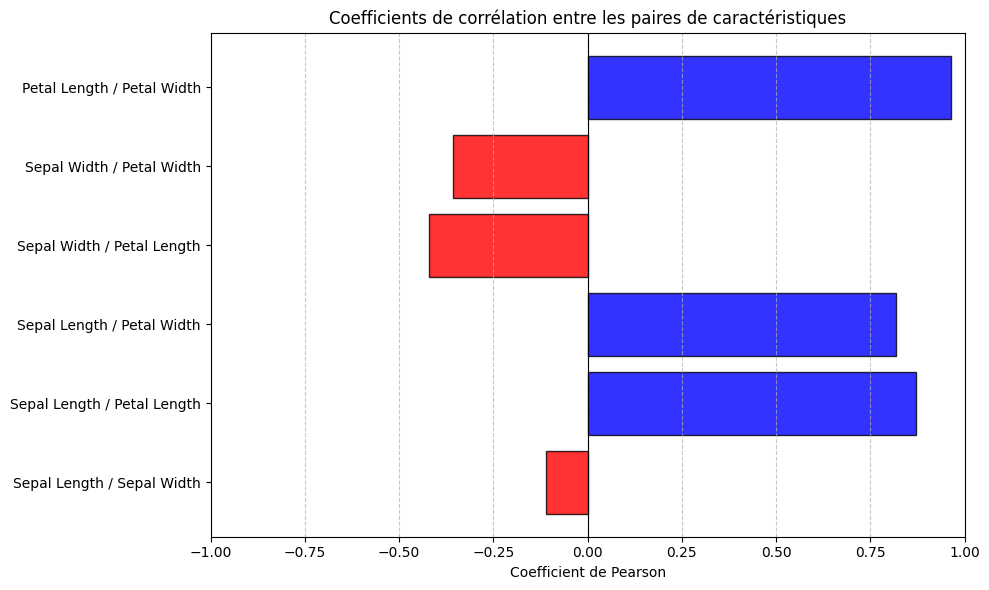

In [31]:

import matplotlib.pyplot as plt

labels = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
pairs = []
corrs = []

for i in range(len(labels)):
    for j in range(i + 1, len(labels)):
        pairs.append(f"{labels[i]} / {labels[j]}")
        corrs.append(correlation_matrix[i, j])

plt.figure(figsize=(10, 6))
# Couleur rouge pour les corrélations négatives, bleu pour les positives
colors = ['red' if c < 0 else 'blue' for c in corrs]

plt.barh(pairs, corrs, color=colors, edgecolor='black', alpha=0.8)
plt.axvline(0, color='black', linewidth=0.8) 
plt.title('Coefficients de corrélation entre les paires de caractéristiques')
plt.xlabel('Coefficient de Pearson')
plt.xlim(-1, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig('../figures/correlation_bar_chart.png')




### F29. Variance par espèce
Identifiez l’espèce avec la plus grande variance globale et visualisez ses distributions.


Espèce avec la plus grande variance : Iris-virginica


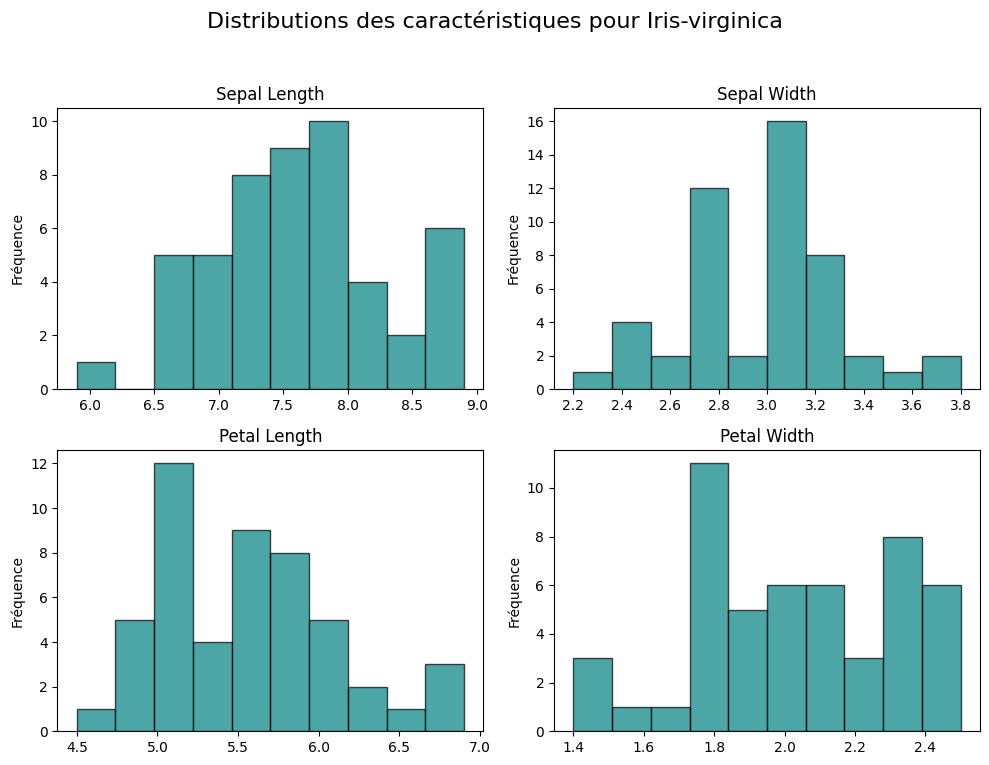

In [32]:

variances = np.var(features_by_species, axis=1) 

#Somme des variances des 4 caractéristiques pour obtenir une "variance globale" par espèce
global_variances = np.sum(variances, axis=1)
species_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

#Identification de l'indice de l'espèce ayant la variance maximale
idx_max = np.argmax(global_variances)
print(f"Espèce avec la plus grande variance : {species_names[idx_max]}")

#Visualisation des distributions (Histogrammes) pour cette espèce spécifique
data_max = features_by_species[idx_max]
labels = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle(f'Distributions des caractéristiques pour {species_names[idx_max]}', fontsize=16)

for i in range(4):
    ax = axes[i//2, i%2]
    ax.hist(data_max[:, i], bins=10, color='teal', edgecolor='black', alpha=0.7)
    ax.set_title(labels[i])
    ax.set_ylabel('Fréquence')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('../figures/max_variance_species_dist.png')



### F30. Conclusion
Rédigez une conclusion contenant **3 insights** issus de votre analyse.


1/
Pour distinguer les espèces, les dimensions des pétales constituent les indicateurs les plus fiables.
L’Iris setosa se reconnaît immédiatement à ses pétales très courts, de taille réduite et remarquablement homogène.
Règle essentielle : quelle que soit l’espèce, la longueur et la largeur des pétales évoluent conjointement et de manière presque proportionnelle, avec une corrélation très élevée (≈ 0,96).

2/
L’Iris virginica est l’espèce la plus hétérogène. Elle se distingue par des dimensions moyennes plus élevées, mais surtout par une dispersion nettement plus importante des mesures. À l’inverse, l’Iris setosa présente une morphologie très uniforme.

3/
Contrairement aux autres caractéristiques morphologiques, la largeur du sépale ne suit pas la tendance générale d’augmentation conjointe. Elle montre une corrélation faible, voire négative, avec les autres mesures, ce qui en fait un critère distinctif et particulièrement utile pour affiner l’identification des espèces.